<a href="https://colab.research.google.com/github/SharonFogel89/Dev-Institute/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customer Behavior & Risk Analysis

This dataset has 5,000 customers with attributes like demographics, behavior, loyalty, churn risk, and even fraud flags.


Problem Statement

The company has a large customer base across different countries, but it lacks insights into customer behavior, loyalty, and risks. Without these insights, it’s difficult to:

improve retention,

detect potential churn,

and optimize marketing efforts.

This project aims to analyze customer data to identify key behavioral drivers, predict churn, and uncover opportunities for increasing customer lifetime value.

Project Objectives

Customer Profiling: Segment customers based on demographics, purchase patterns, and preferences.

Retention & Churn: Identify factors contributing to churn risk and loyalty scores.

Fraud Detection: Explore fraud patterns and potential indicators.

Engagement Analysis: Evaluate customer responsiveness (e.g., email open rate) by segment.

Actionable Insights: Provide recommendations for targeted marketing, retention strategies, and fraud prevention.

5 Key Business Questions

Customer Segmentation:

What are the main customer segments by demographics, loyalty, and preferred categories?

Revenue Drivers:

Which factors (e.g., age, loyalty score, order behavior) have the strongest impact on average order value and total orders?

Churn Risk:

What customer characteristics are most associated with a high churn risk?

Can we predict which customers are likely to churn soon?

Fraudulent Behavior:

What patterns differentiate fraudulent from non-fraudulent customers?

Are fraud cases concentrated in specific regions, categories, or loyalty levels?

Customer Engagement:

How does email open rate vary by segment, and does it correlate with loyalty or churn risk?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive

Load dataset

In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/Colab Notebooks/Final Project/customer_analytics_dataset.csv'
df = pd.read_csv(file_path)

Preview

In [ ]:
df.head()

,customer_id,age,gender,country,avg_order_value,total_orders,last_purchase,is_fraudulent,preferred_category,email_open_rate,customer_since,loyalty_score,churn_risk
0,CUST_8270,30,Female,Brazil,101.08,8,176,1,Beauty,25.6,2024-06-05,50,0.20
1,CUST_1860,53,Female,USA,90.39,10,88,0,Electronics,12.3,2024-02-19,37,0.34
2,CUST_6390,73,Male,Australia,83.28,6,203,0,Sports,NaN,2024-04-16,65,0.05
3,CUST_6191,30,Other,Japan,109.90,9,346,1,Electronics,42.9,2020-07-08,93,0.19
4,CUST_6734,29,Female,Canada,269.38,16,342,0,Fashion,5.3,2025-04-09,79,0.15


Data Understanding

Column names - ensures all fields are recognized.

In [ ]:
print("\n📌 Column Names:")
print(df.columns.tolist())


📌 Column Names:
['customer_id', 'age', 'gender', 'country', 'avg_order_value', 'total_orders', 'last_purchase', 'is_fraudulent', 'preferred_category', 'email_open_rate', 'customer_since', 'loyalty_score', 'churn_risk']


Data types - numeric vs categorical

In [ ]:
print("\n📌 Data Types:")
print(df.dtypes)


📌 Data Types:
customer_id            object
age                     int64
gender                 object
country                object
avg_order_value       float64
total_orders            int64
last_purchase           int64
is_fraudulent           int64
preferred_category     object
email_open_rate       float64
customer_since         object
loyalty_score           int64
churn_risk            float64
dtype: object


Missing values - important for data cleaning

In [ ]:
print("\n📌 Missing Values:")
print(df.isnull().sum())


📌 Missing Values:
customer_id             0
age                     0
gender                  0
country                 0
avg_order_value       250
total_orders            0
last_purchase           0
is_fraudulent           0
preferred_category      0
email_open_rate       250
customer_since          0
loyalty_score           0
churn_risk              0
dtype: int64


Unique values for categorical variables (like gender, country, preferred_category)

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values → {df[col].unique()[:10]}")

customer_id: 3809 unique values → ['CUST_8270' 'CUST_1860' 'CUST_6390' 'CUST_6191' 'CUST_6734' 'CUST_7265'
 'CUST_1466' 'CUST_5426' 'CUST_6578' 'CUST_9322']
gender: 3 unique values → ['Female' 'Male' 'Other']
country: 10 unique values → ['Brazil' 'USA' 'Australia' 'Japan' 'Canada' 'France' 'India' 'China'
 'Germany' 'UK']
preferred_category: 5 unique values → ['Beauty' 'Electronics' 'Sports' 'Fashion' 'Home']
customer_since: 1701 unique values → ['2024-06-05' '2024-02-19' '2024-04-16' '2020-07-08' '2025-04-09'
 '2021-10-02' '2021-12-19' '2021-02-09' '2020-09-02' '2024-02-25']


Quick statistical summary (numeric) - min, max, mean, std, quartiles

In [ ]:
print("\n📌 Statistical Summary (Numeric Variables):")
display(df.describe().T)


📌 Statistical Summary (Numeric Variables):


,count,mean,std,min,25%,50%,75%,max
age,5000.0,48.163200,17.880797,18.00,33.000,48.00,64.0000,79.00
avg_order_value,4750.0,108.442857,69.265559,10.66,57.805,93.19,142.1975,555.46
total_orders,5000.0,10.027000,3.163838,0.00,8.000,10.00,12.0000,23.00
last_purchase,5000.0,180.073200,104.926518,0.00,89.000,178.00,270.0000,364.00
is_fraudulent,5000.0,0.025800,0.158554,0.00,0.000,0.00,0.0000,1.00
email_open_rate,4750.0,50.714842,29.098706,0.00,25.225,50.95,76.8000,100.00
loyalty_score,5000.0,50.039400,28.832151,1.00,25.000,50.00,75.0000,99.00
churn_risk,5000.0,0.284484,0.159690,0.00,0.160,0.26,0.3900,0.90


Statistical summary (categorical) - most frequent value, counts, etc

In [ ]:
print("\n📌 Statistical Summary (Categorical Variables):")
display(df.describe(include=['object']).T)


📌 Statistical Summary (Categorical Variables):


,count,unique,top,freq
customer_id,5000,3809,CUST_5780,6
gender,5000,3,Male,2278
country,5000,10,Australia,518
preferred_category,5000,5,Beauty,1035
customer_since,5000,1701,2020-12-22,11


Data Cleaning & Preparation

In [ ]:
import pandas as pd
import numpy as np

1) Convert data types IN PLACE

Dates

In [ ]:
df['customer_since'] = pd.to_datetime(df['customer_since'], errors='coerce')

Categoricals

In [ ]:
for col in ['gender', 'country', 'preferred_category']:
    if col in df.columns:
        df[col] = df[col].astype('category')

IDs as string

In [ ]:
if 'customer_id' in df.columns:
    df['customer_id'] = df['customer_id'].astype('string')

Numeric safe coercions

In [ ]:
num_cols = ['age', 'avg_order_value', 'total_orders', 'email_open_rate',
            'loyalty_score', 'churn_risk', 'last_purchase']
for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

Booleans from 0/1

In [ ]:
if 'is_fraudulent' in df.columns:
    df['is_fraudulent'] = (
        pd.to_numeric(df['is_fraudulent'], errors='coerce')
          .fillna(0).astype(int).astype(bool)
    )

Keep churn in [0, 1]

In [ ]:
if 'churn_risk' in df.columns:
    df['churn_risk'] = df['churn_risk'].clip(lower=0, upper=1)

2) Remove duplicates IN PLACE

In [ ]:
if 'customer_id' in df.columns:
    df.drop_duplicates(subset=['customer_id'], keep='last', inplace=True)
else:
    df.drop_duplicates(keep='last', inplace=True)

3) Handle missing values IN PLACE

Categorical → "Unknown"

In [ ]:
for col in ['gender', 'country', 'preferred_category']:
    if col in df.columns:
        # ensure the category exists before filling
        if not isinstance(df[col].dtype, pd.CategoricalDtype):
            df[col] = df[col].astype('category')
        df[col] = df[col].cat.add_categories(['Unknown']).fillna('Unknown')

def fill_with_group_median_inplace(df_, target, by):
    """Fill NA in target using group-median by 'by'; fallback to global median."""
    if target not in df_.columns or by not in df_.columns:
        return
    med = df_.groupby(by, dropna=False)[target].transform('median')
    df_.loc[df_[target].isna(), target] = med[df_[target].isna()]
    df_[target].fillna(df_[target].median(), inplace=True)

Age by gender

In [ ]:
if 'age' in df.columns and 'gender' in df.columns:
    fill_with_group_median_inplace(df, 'age', 'gender')

/tmp/ipython-input-4094777003.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  med = df_.groupby(by, dropna=False)[target].transform('median')
/tmp/ipython-input-4094777003.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_[target].fillna(df_[target].median(), inplace=True)


AOV / orders / open rate by preferred_category

In [ ]:
if 'avg_order_value' in df.columns and 'preferred_category' in df.columns:
    fill_with_group_median_inplace(df, 'avg_order_value', 'preferred_category')

if 'total_orders' in df.columns and 'preferred_category' in df.columns:
    fill_with_group_median_inplace(df, 'total_orders', 'preferred_category')
    df['total_orders'] = df['total_orders'].round().astype('Int64')

if 'email_open_rate' in df.columns and 'preferred_category' in df.columns:
    fill_with_group_median_inplace(df, 'email_open_rate', 'preferred_category')

/tmp/ipython-input-4094777003.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  med = df_.groupby(by, dropna=False)[target].transform('median')
/tmp/ipython-input-4094777003.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_[target].fillna(df_[target].median(), inplace=True)
/tmp/ipython-input-4094777003.py:12: FutureWarning: The

Global medians for the rest

In [ ]:
if 'loyalty_score' in df.columns:
    df['loyalty_score'].fillna(df['loyalty_score'].median(), inplace=True)

if 'churn_risk' in df.columns:
    df['churn_risk'].fillna(df['churn_risk'].median(), inplace=True)

if 'customer_since' in df.columns:
    median_date = df['customer_since'].dropna().median()
    df['customer_since'].fillna(median_date, inplace=True)

if 'last_purchase' in df.columns:
    df['last_purchase'].fillna(df['last_purchase'].median(), inplace=True)

/tmp/ipython-input-3684997002.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['loyalty_score'].fillna(df['loyalty_score'].median(), inplace=True)
/tmp/ipython-input-3684997002.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

4) Feature engineering IN PLACE

Total spend

In [ ]:
if set(['avg_order_value', 'total_orders']).issubset(df.columns):
    df['total_spend'] = df['avg_order_value'] * df['total_orders'].astype(float)

Tenure (days since sign-up)

In [ ]:
if 'customer_since' in df.columns:
    today = pd.Timestamp('today').normalize()
    df['tenure_days'] = (today - df['customer_since']).dt.days

Last purchase date from "days since last purchase"

In [ ]:
if 'last_purchase' in df.columns:
    today = pd.Timestamp('today').normalize()
    df['last_purchase_date'] = today - pd.to_timedelta(df['last_purchase'], unit='D')

Sales quarter (prefer last_purchase_date; fallback to customer_since)

In [ ]:
if 'last_purchase_date' in df.columns and pd.api.types.is_datetime64_any_dtype(df['last_purchase_date']):
    df['sales_quarter'] = (
        df['last_purchase_date'].dt.year.astype('Int64').astype('string') +
        'Q' + df['last_purchase_date'].dt.quarter.astype('Int64').astype('string')
    )
elif 'customer_since' in df.columns:
    df['sales_quarter'] = (
        df['customer_since'].dt.year.astype('Int64').astype('string') +
        'Q' + df['customer_since'].dt.quarter.astype('Int64').astype('string')
    )

Age groups

In [ ]:
if 'age' in df.columns:
    df['age_group'] = pd.cut(
        df['age'],
        bins=[0, 24, 34, 44, 54, 64, 120],
        labels=['<25', '25-34', '35-44', '45-54', '55-64', '65+'],
        right=True, include_lowest=True
    ).astype('category')

Engagement bands

In [ ]:
if 'email_open_rate' in df.columns:
    df['engagement_band'] = pd.cut(
        df['email_open_rate'],
        bins=[-0.001, 10, 20, 40, 60, 100],
        labels=['0–10%', '10–20%', '20–40%', '40–60%', '60–100%']
    ).astype('category')

Active in last 90 days

In [ ]:
if 'last_purchase' in df.columns:
    df['is_active_90d'] = (df['last_purchase'] <= 90)

Value segment (quartiles; fallback to binary)

In [ ]:
    try:
        df['value_segment'] = pd.qcut(
            df['total_spend'].rank(method='first'),
            q=4, labels=['Low', 'Mid', 'High', 'Top']
        ).astype('category')
    except ValueError:
        df['value_segment'] = pd.cut(
            df['total_spend'],
            bins=[-np.inf, df['total_spend'].median(), np.inf],
            labels=['Low','High']
        ).astype('category')

RFM-like scores

In [ ]:
if 'last_purchase' in df.columns:
    df['r_score'] = pd.qcut(df['last_purchase'].rank(method='first'), 5, labels=[5,4,3,2,1]).astype(int)
if 'total_orders' in df.columns:
    df['f_score'] = pd.qcut(df['total_orders'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)
if 'avg_order_value' in df.columns:
    df['m_score'] = pd.qcut(df['avg_order_value'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)
if set(['r_score','f_score','m_score']).issubset(df.columns):
    df['rfm_score'] = df['r_score'] + df['f_score'] + df['m_score']

Targeting flags

In [ ]:
if 'churn_risk' in df.columns:
    df['is_high_churn_risk'] = df['churn_risk'] >= 0.5
if 'total_spend' in df.columns:
    df['is_high_value'] = df['total_spend'] >= df['total_spend'].median()

Ensure engineered categoricals have the right dtype

In [ ]:
for col in ['age_group', 'engagement_band', 'value_segment', 'sales_quarter']:
    if col in df.columns:
        df[col] = df[col].astype('category')

5) Quick checks

In [ ]:
print("✅ Final shape:", df.shape)

✅ Final shape: (3809, 27)


In [ ]:
print("✅ Top missing after cleaning:\n", df.isna().sum().sort_values(ascending=False).head(15))

✅ Top missing after cleaning:
 customer_id           0
age                   0
gender                0
country               0
avg_order_value       0
total_orders          0
last_purchase         0
is_fraudulent         0
preferred_category    0
email_open_rate       0
customer_since        0
loyalty_score         0
churn_risk            0
total_spend           0
tenure_days           0
dtype: int64


In [ ]:
print("✅ Dtypes:\n", df.dtypes)

✅ Dtypes:
 customer_id           string[python]
age                            int64
gender                      category
country                     category
avg_order_value              float64
total_orders                   Int64
last_purchase                  int64
is_fraudulent                   bool
preferred_category          category
email_open_rate              float64
customer_since        datetime64[ns]
loyalty_score                  int64
churn_risk                   float64
total_spend                  float64
tenure_days                    int64
last_purchase_date    datetime64[ns]
sales_quarter               category
age_group                   category
engagement_band             category
is_active_90d                   bool
value_segment               category
r_score                        int64
f_score                        int64
m_score                        int64
rfm_score                      int64
is_high_churn_risk              bool
is_high_value              

Imports, style, and light prep

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style="whitegrid")  # clean default look

Ensure date columns are parsed (safe even if already parsed)

In [ ]:
if 'customer_since' in df.columns:
    df['customer_since'] = pd.to_datetime(df['customer_since'], errors='coerce')

If you haven't engineered last_purchase_date yet, we can infer it from "days since last purchase"
(proxy; per-customer not transactional)

In [ ]:
if 'last_purchase' in df.columns and 'last_purchase_date' not in df.columns:
    today = pd.Timestamp('today').normalize()
    # Use a temporary series to avoid permanently modifying df if you prefer
    df['last_purchase_date'] = today - pd.to_timedelta(pd.to_numeric(df['last_purchase'], errors='coerce'), unit='D')

Helpful proxy for monetary value if present

In [ ]:
if {'avg_order_value', 'total_orders'}.issubset(df.columns) and 'total_spend' not in df.columns:
    df['total_spend'] = pd.to_numeric(df['avg_order_value'], errors='coerce') * pd.to_numeric(df['total_orders'], errors='coerce')

Distribution plots for key numeric variables

Choose common numeric columns automatically (filters out ids)

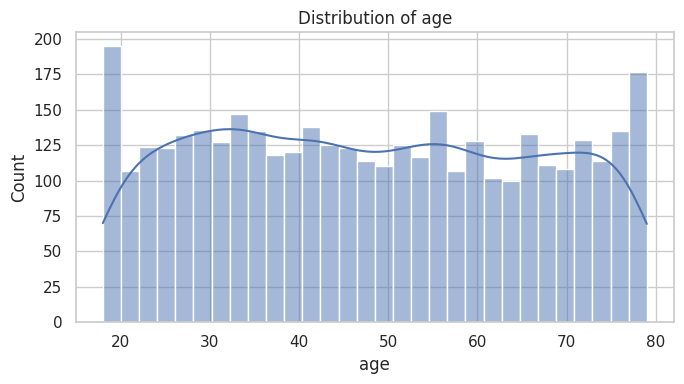

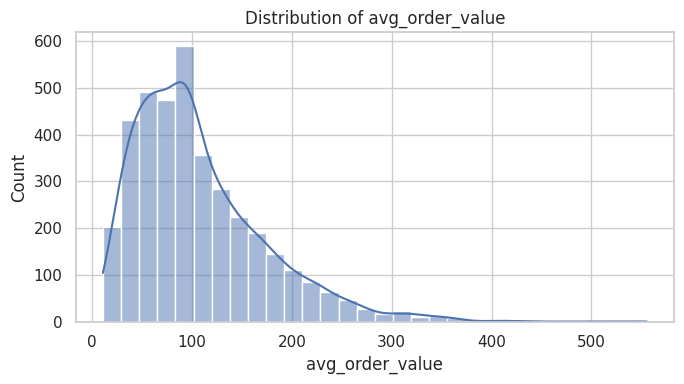

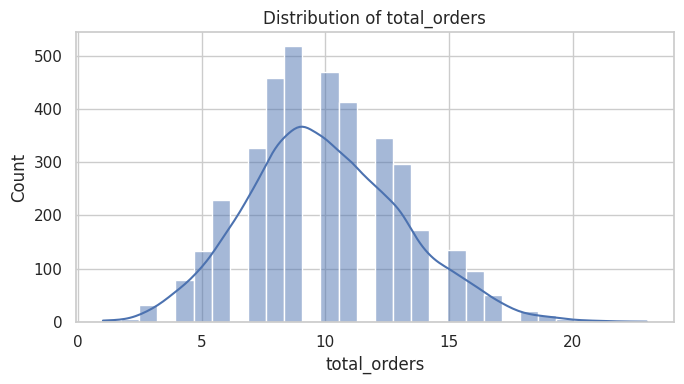

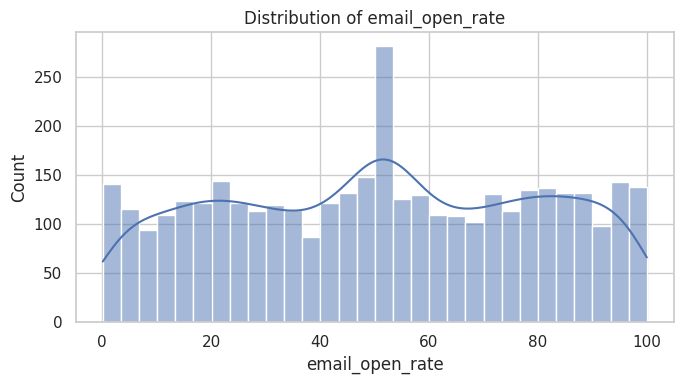

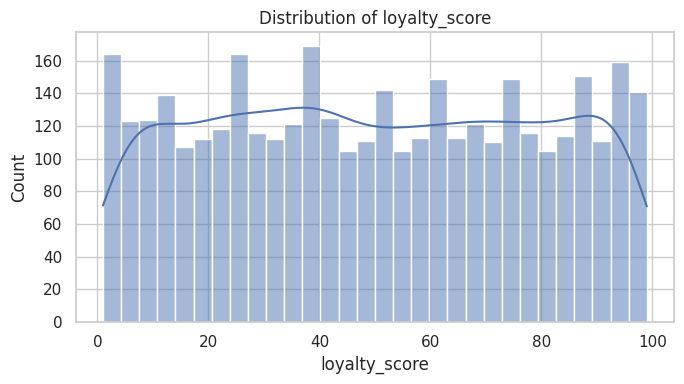

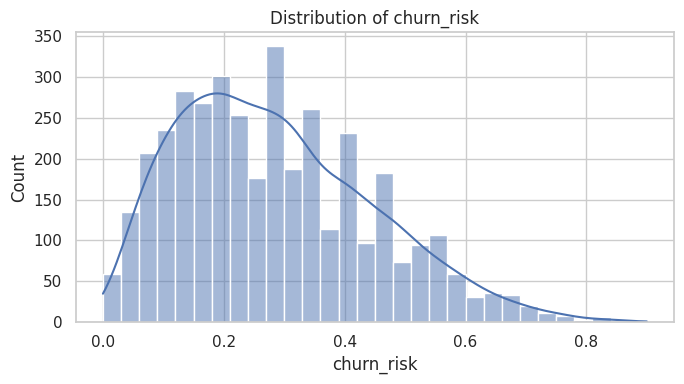

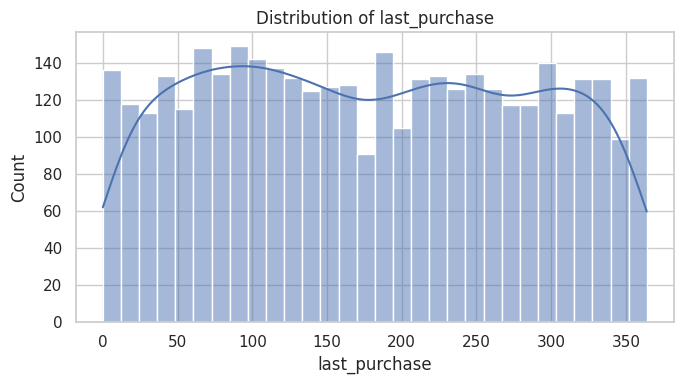

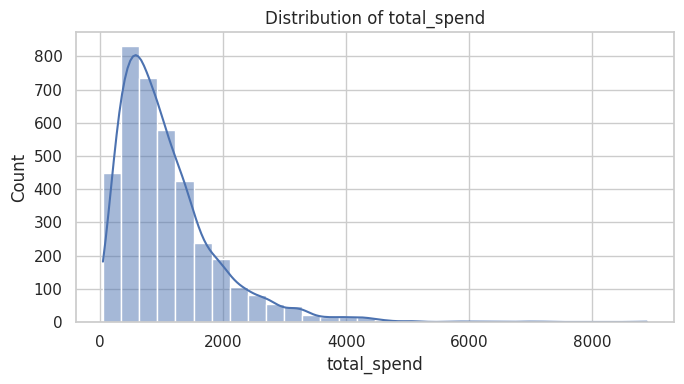

In [ ]:
candidate_numeric = ['age','avg_order_value','total_orders','email_open_rate',
                     'loyalty_score','churn_risk','last_purchase','total_spend']
numeric_cols = [c for c in candidate_numeric if c in df.columns]

for col in numeric_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

Quick boxplots to spot outliers

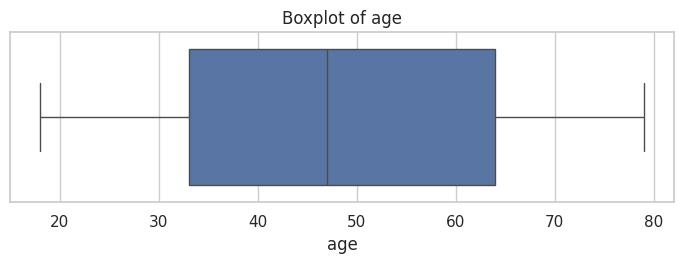

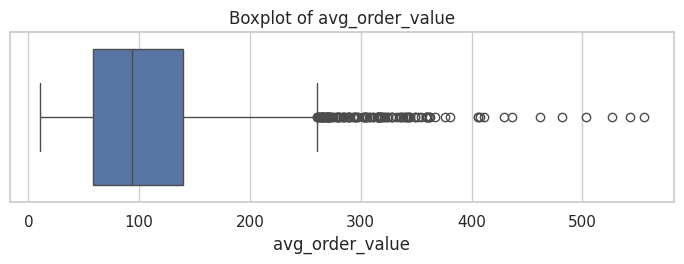

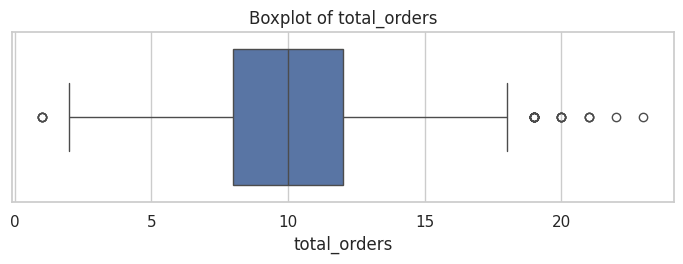

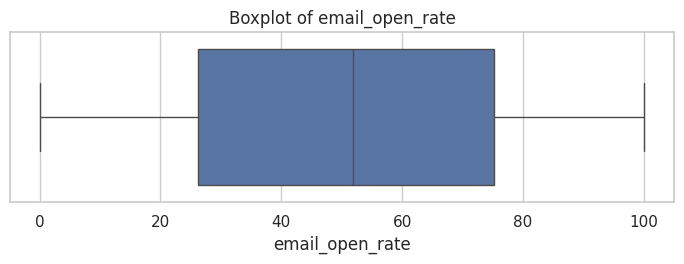

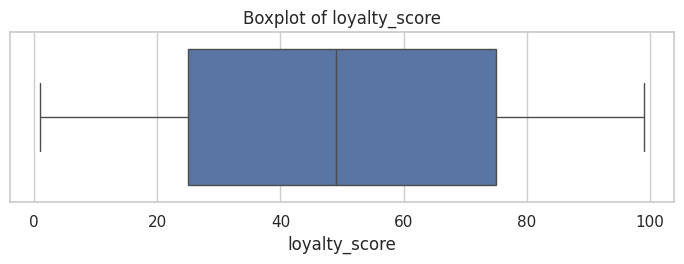

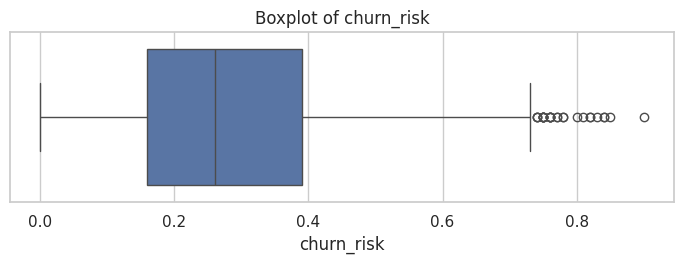

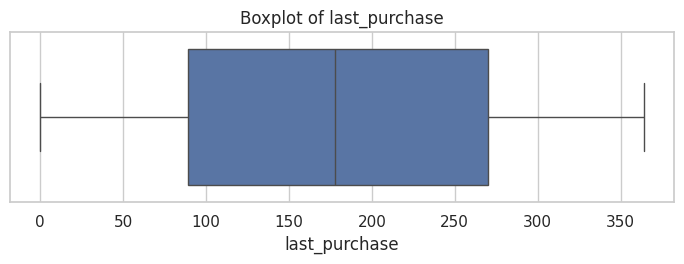

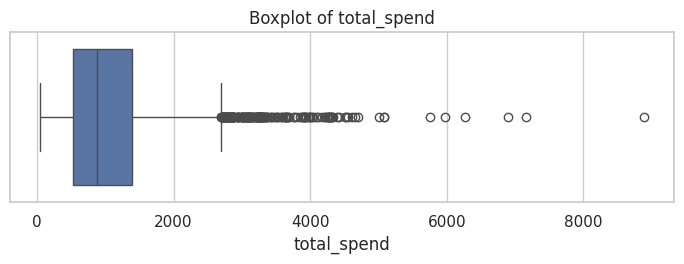

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(7,2.8))
    sns.boxplot(x=df[col].dropna())
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

Bar charts for top categories

Pick likely categorical fields (only those that exist)

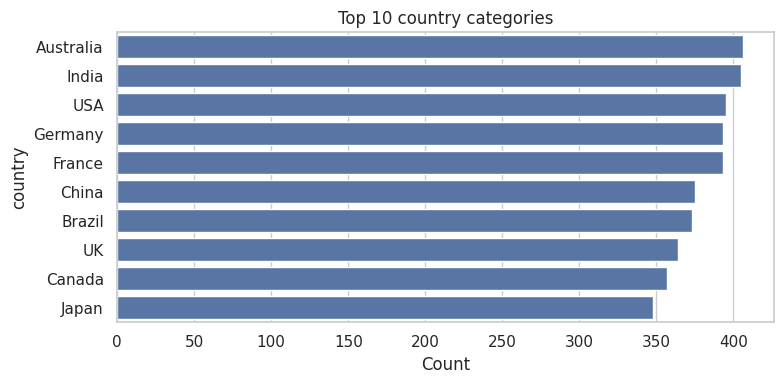

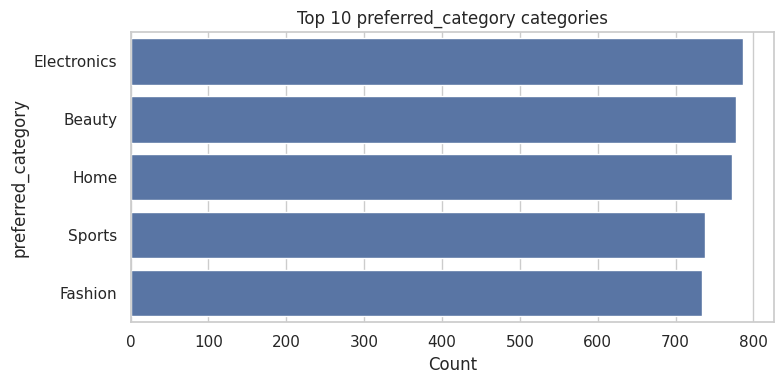

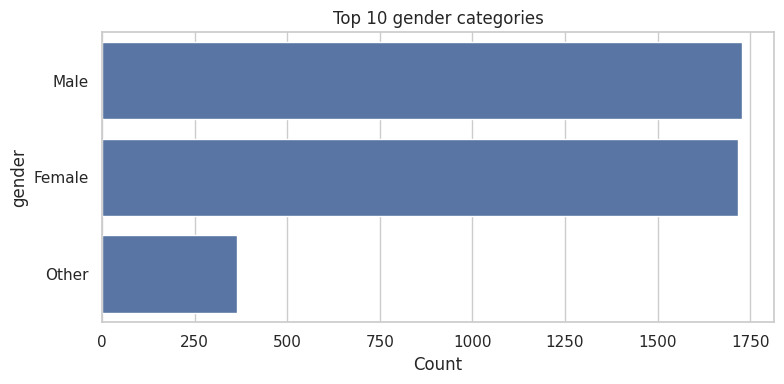

In [ ]:
cat_cols = [c for c in ['country','preferred_category','gender'] if c in df.columns]

TOP_N = 10  # adjust as needed

for col in cat_cols:
    counts = df[col].astype('object').fillna('Unknown').value_counts().head(TOP_N)
    plt.figure(figsize=(8,4))
    sns.barplot(x=counts.values, y=counts.index)
    plt.title(f"Top {TOP_N} {col} categories")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

3) Time series trends (if applicable)

These are customer-level proxies (not transaction-level).

New customers per month uses customer_since.

New customers per month (signups)

In [ ]:
if 'customer_since' in df.columns:
    monthly_signups = (
        df.dropna(subset=['customer_since'])
          .assign(month=df['customer_since'].dt.to_period('M').astype(str))
          .groupby('month', as_index=False)
          .size()
    )

sort by month

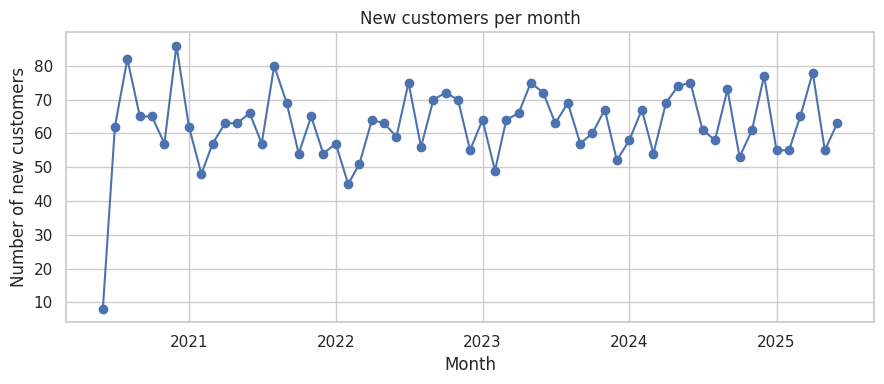

In [ ]:
    monthly_signups['month'] = pd.to_datetime(monthly_signups['month'])
    monthly_signups = monthly_signups.sort_values('month')

    plt.figure(figsize=(9,4))
    plt.plot(monthly_signups['month'], monthly_signups['size'], marker='o')
    plt.title("New customers per month")
    plt.xlabel("Month")
    plt.ylabel("Number of new customers")
    plt.tight_layout()
    plt.show()

Spend proxy by last_purchase month

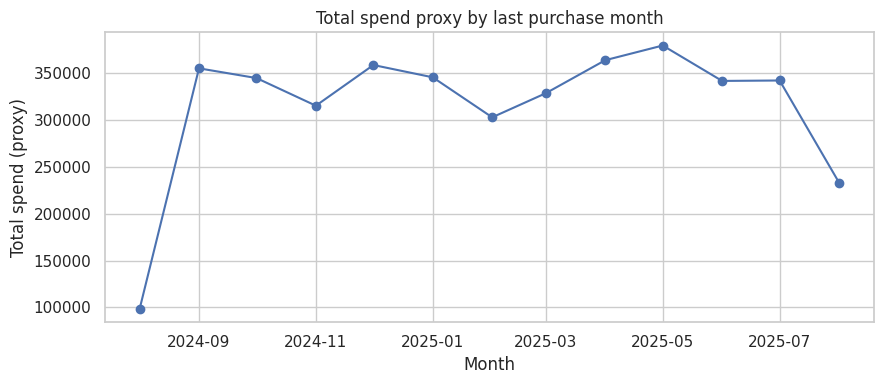

In [ ]:
if {'last_purchase_date','total_spend'}.issubset(df.columns):
    monthly_spend_proxy = (
        df.dropna(subset=['last_purchase_date'])
          .assign(month=df['last_purchase_date'].dt.to_period('M').astype(str))
          .groupby('month', as_index=False)['total_spend'].sum()
    )
    monthly_spend_proxy['month'] = pd.to_datetime(monthly_spend_proxy['month'])
    monthly_spend_proxy = monthly_spend_proxy.sort_values('month')

    plt.figure(figsize=(9,4))
    plt.plot(monthly_spend_proxy['month'], monthly_spend_proxy['total_spend'], marker='o')
    plt.title("Total spend proxy by last purchase month")
    plt.xlabel("Month")
    plt.ylabel("Total spend (proxy)")
    plt.tight_layout()
    plt.show()

Active customers proxy by month (last purchase within that month)

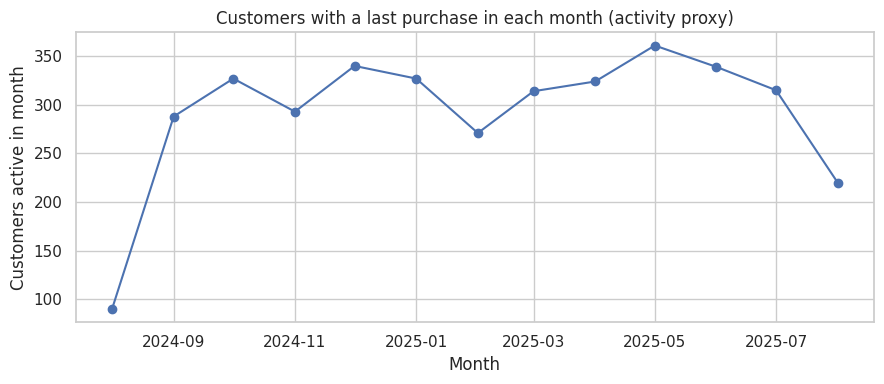

In [ ]:
if 'last_purchase_date' in df.columns:
    monthly_active = (
        df.dropna(subset=['last_purchase_date'])
          .assign(month=df['last_purchase_date'].dt.to_period('M').astype(str))
          .groupby('month', as_index=False)
          .size()
    )
    monthly_active['month'] = pd.to_datetime(monthly_active['month'])
    monthly_active = monthly_active.sort_values('month')

    plt.figure(figsize=(9,4))
    plt.plot(monthly_active['month'], monthly_active['size'], marker='o')
    plt.title("Customers with a last purchase in each month (activity proxy)")
    plt.xlabel("Month")
    plt.ylabel("Customers active in month")
    plt.tight_layout()
    plt.show()

4) Correlation heatmap for numeric variables

Select numeric columns (keeps bool as 0/1)

In [ ]:
num_df = df.select_dtypes(include=[np.number]).copy()

Optional: drop id-like or degenerate columns if they slipped in

In [ ]:
for drop_candidate in ['customer_id']:
    if drop_candidate in num_df.columns:
        num_df = num_df.drop(columns=[drop_candidate])

Compute correlation (Pearson)

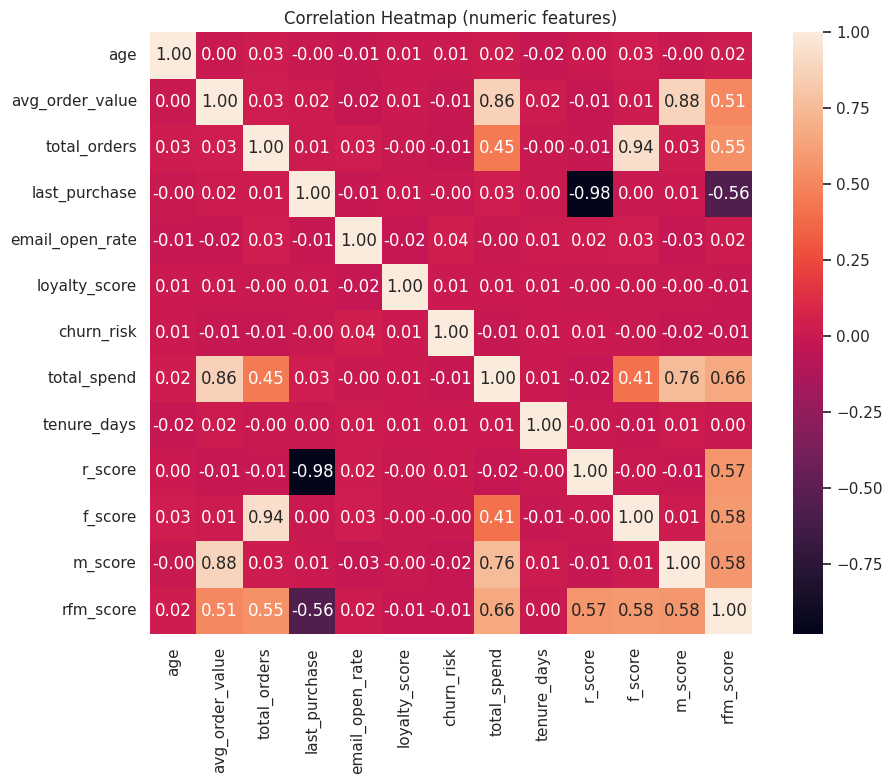

In [ ]:
corr = num_df.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", square=True)
plt.title("Correlation Heatmap (numeric features)")
plt.tight_layout()
plt.show()

Step 5 – Analysis / Modeling

Prereqs & lightweight feature prep

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.contingency_tables import Table2x2
from statsmodels.stats.power import TTestIndPower

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    roc_auc_score, average_precision_score, roc_curve, precision_recall_curve,
    confusion_matrix, ConfusionMatrixDisplay, classification_report,
    mean_absolute_error, mean_squared_error, r2_score
)
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.inspection import permutation_importance


Gentle feature prep (safe if already done)

In [ ]:
if 'customer_since' in df.columns:
    df['customer_since'] = pd.to_datetime(df['customer_since'], errors='coerce')

if {'avg_order_value','total_orders'}.issubset(df.columns) and 'total_spend' not in df.columns:
    df['total_spend'] = pd.to_numeric(df['avg_order_value'], errors='coerce') * \
                        pd.to_numeric(df['total_orders'], errors='coerce')

if 'last_purchase' in df.columns and 'last_purchase_date' not in df.columns:
    today = pd.Timestamp('today').normalize()
    df['last_purchase_date'] = today - pd.to_timedelta(pd.to_numeric(df['last_purchase'], errors='coerce'), unit='D')

Optional binary “high churn” label for classification demos

In [ ]:
if 'churn_risk' in df.columns and 'is_high_churn_risk' not in df.columns:
    df['is_high_churn_risk'] = (df['churn_risk'] >= 0.5).astype(int)

Make sure booleans are ints for sklearn

In [ ]:
for b in ['is_fraudulent', 'is_high_churn_risk']:
    if b in df.columns:
        df[b] = df[b].astype(int)

A) Statistical tests (answer why/what’s different?)
A1) Association between loyalty_score and churn_risk (Spearman)

Good for monotonic relationships, robust to non-normal data.

In [ ]:
if {'loyalty_score','churn_risk'}.issubset(df.columns):
    x = pd.to_numeric(df['loyalty_score'], errors='coerce')
    y = pd.to_numeric(df['churn_risk'], errors='coerce')
    mask = x.notna() & y.notna()
    rho, p = stats.spearmanr(x[mask], y[mask])
    print(f"Spearman rho(loyalty_score, churn_risk) = {rho:.3f}, p = {p:.3g}")
    print("Interpretation: negative rho → higher loyalty associates with lower churn risk (good).")

Spearman rho(loyalty_score, churn_risk) = 0.007, p = 0.683
Interpretation: negative rho → higher loyalty associates with lower churn risk (good).


A2) Do categories differ in avg_order_value? (ANOVA + Tukey)

In [ ]:
if {'avg_order_value','preferred_category'}.issubset(df.columns):
    tmp = df[['avg_order_value','preferred_category']].dropna()
    # One-way ANOVA
    groups = [g['avg_order_value'].values for _, g in tmp.groupby('preferred_category')]
    F, p = stats.f_oneway(*groups)
    print(f"ANOVA AOV ~ preferred_category: F={F:.2f}, p={p:.3g}")
    print("If p<0.05: at least one category’s mean AOV differs; see Tukey below.")

ANOVA AOV ~ preferred_category: F=nan, p=nan
If p<0.05: at least one category’s mean AOV differs; see Tukey below.


/tmp/ipython-input-2233290878.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [g['avg_order_value'].values for _, g in tmp.groupby('preferred_category')]
/tmp/ipython-input-2233290878.py:5: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  F, p = stats.f_oneway(*groups)


Post-hoc Tukey HSD

In [ ]:
tukey = pairwise_tukeyhsd(endog=tmp['avg_order_value'], groups=tmp['preferred_category'], alpha=0.05)
print(tukey.summary())

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower    upper  reject
---------------------------------------------------------------
     Beauty Electronics  -0.4565 0.9999  -9.7823  8.8694  False
     Beauty     Fashion   3.5357 0.8478  -5.9559 13.0274  False
     Beauty        Home   3.1886 0.8858  -6.1791 12.5563  False
     Beauty      Sports   1.8132 0.9852  -7.6652 11.2916  False
Electronics     Fashion   3.9922 0.7789  -5.4701 13.4545  False
Electronics        Home    3.645 0.8243  -5.6929  12.983  False
Electronics      Sports   2.2697 0.9656  -7.1793 11.7187  False
    Fashion        Home  -0.3472    1.0  -9.8507  9.1564  False
    Fashion      Sports  -1.7225 0.9884 -11.3352  7.8902  False
       Home      Sports  -1.3754 0.9948 -10.8657   8.115  False
---------------------------------------------------------------


A3) Does avg_order_value differ by gender? (t-test + Mann–Whitney)

In [ ]:
if {'avg_order_value','gender'}.issubset(df.columns):
    sub = df[['avg_order_value','gender']].dropna()
    # Keep two groups (e.g., Female vs Male); adapt if you want to compare Other separately
    g_keep = sub['gender'].isin(['Female','Male'])
    sub = sub[g_keep]
    g1 = sub.loc[sub['gender']=='Female','avg_order_value'].values
    g2 = sub.loc[sub['gender']=='Male','avg_order_value'].values

    t,p = stats.ttest_ind(g1, g2, equal_var=False)  # Welch’s t-test
    print(f"Welch t-test AOV Female vs Male: t={t:.2f}, p={p:.3g}")

    u,p_u = stats.mannwhitneyu(g1, g2, alternative='two-sided')
    print(f"Mann–Whitney U (robust): U={u:.0f}, p={p_u:.3g}")
    print("Interpretation: p<0.05 → significant difference in median/mean AOV between genders.")

Welch t-test AOV Female vs Male: t=-1.67, p=0.0944
Mann–Whitney U (robust): U=1449630, p=0.258
Interpretation: p<0.05 → significant difference in median/mean AOV between genders.


A4) Are fraud rates different across countries? (Chi-square)

In [ ]:
if {'is_fraudulent','country'}.issubset(df.columns):
    top_c = df['country'].value_counts().head(10).index
    sub = df[df['country'].isin(top_c)].copy()
    ct = pd.crosstab(sub['country'], sub['is_fraudulent'])
    chi2, p, dof, exp = stats.chi2_contingency(ct)
    print(f"Chi-square(country vs fraud): chi2={chi2:.2f}, dof={dof}, p={p:.3g}")
    print("Interpretation: p<0.05 → fraud rate depends on country. Inspect rows with higher fraud proportion.")

Chi-square(country vs fraud): chi2=8.61, dof=9, p=0.474
Interpretation: p<0.05 → fraud rate depends on country. Inspect rows with higher fraud proportion.


A5) Explanatory OLS: avg_order_value ~ age + total_orders + C(country) + C(preferred_category)

In [ ]:
cols_needed = {'avg_order_value','age','total_orders','country','preferred_category'}
if cols_needed.issubset(df.columns):
    sub = df[list(cols_needed)].dropna()
    model = smf.ols("avg_order_value ~ age + total_orders + C(country) + C(preferred_category)", data=sub).fit()
    print(model.summary())
    print("Interpretation: significant positive coefficients indicate drivers of higher AOV (hold others constant).")

                            OLS Regression Results                            
Dep. Variable:        avg_order_value   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8884
Date:                Fri, 22 Aug 2025   Prob (F-statistic):              0.577
Time:                        12:28:23   Log-Likelihood:                -21445.
No. Observations:                3809   AIC:                         4.292e+04
Df Residuals:                    3793   BIC:                         4.302e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


B) Machine learning models (predict who/what/when)

B1) Churn classification: who is high churn risk?

Target: is_high_churn_risk (derived from churn_risk >= 0.5)

Features: demographics, behavior, engagement, preference

Metrics: ROC-AUC (ranking), PR-AUC (imbalanced), confusion matrix at 0.5 threshold

In [ ]:
target = 'is_high_churn_risk'
num_feats = [c for c in ['age','avg_order_value','total_orders','email_open_rate','loyalty_score','last_purchase'] if c in df.columns]
cat_feats = [c for c in ['gender','country','preferred_category'] if c in df.columns]
feats = num_feats + cat_feats

if target in df.columns and len(feats) > 0:
    data = df[feats + [target]].dropna()
    X = data[feats]
    y = data[target].astype(int)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    pre = ColumnTransformer(
        transformers=[
            ('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                   ('scaler', StandardScaler())]), num_feats),
            ('cat', Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                   ('oh', OneHotEncoder(handle_unknown='ignore'))]), cat_feats)
        ]
    )

    clf = LogisticRegression(max_iter=200, class_weight='balanced')  # simple, explainable baseline
    pipe = Pipeline(steps=[('pre', pre), ('model', clf)])
    pipe.fit(X_train, y_train)

Evaluation

In [ ]:
proba = pipe.predict_proba(X_test)[:,1]
preds = (proba >= 0.5).astype(int)
auc = roc_auc_score(y_test, proba)
ap = average_precision_score(y_test, proba)
print(f"Churn ROC-AUC: {auc:.3f} | PR-AUC: {ap:.3f}")
print(classification_report(y_test, preds, digits=3))

Churn ROC-AUC: 0.470 | PR-AUC: 0.111
              precision    recall  f1-score   support

           0      0.882     0.524     0.657       674
           1      0.113     0.466     0.182        88

    accuracy                          0.517       762
   macro avg      0.498     0.495     0.420       762
weighted avg      0.794     0.517     0.602       762



Curves

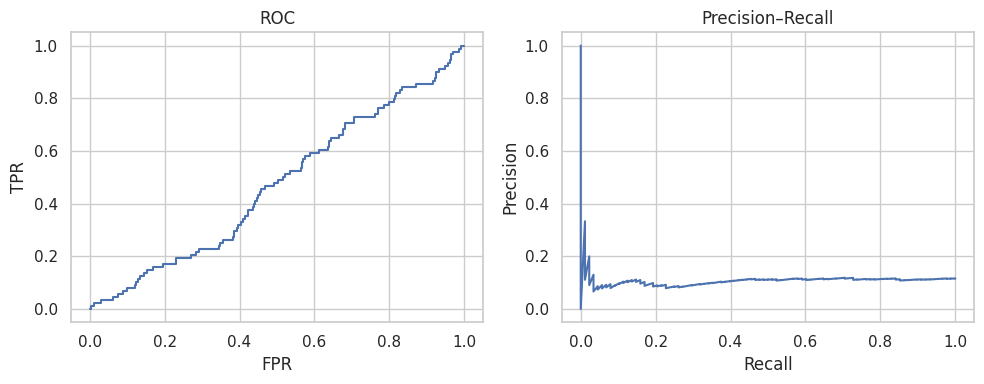

In [ ]:
fpr, tpr, _ = roc_curve(y_test, proba)
prec, rec, _ = precision_recall_curve(y_test, proba)
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].plot(fpr, tpr); ax[0].set_title("ROC"); ax[0].set_xlabel("FPR"); ax[0].set_ylabel("TPR")
ax[1].plot(rec, prec); ax[1].set_title("Precision–Recall"); ax[1].set_xlabel("Recall"); ax[1].set_ylabel("Precision")
plt.tight_layout(); plt.show()

Confusion Matrix

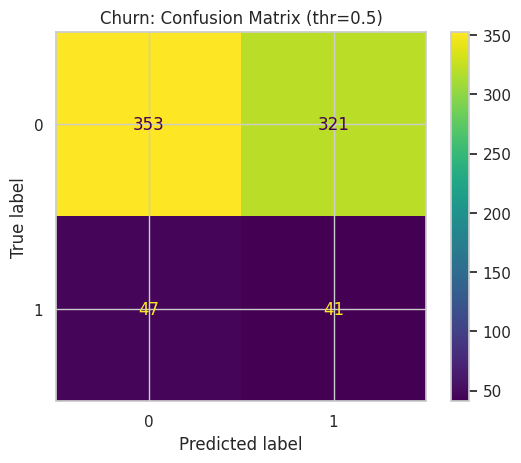

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, preds)
plt.title("Churn: Confusion Matrix (thr=0.5)"); plt.show()

B2) Fraud detection (often imbalanced)
Target: is_fraudulent

Model: RandomForestClassifier with class_weight='balanced'

Metrics: ROC-AUC, PR-AUC, confusion matrix

Fraud ROC-AUC: 0.523 | PR-AUC: 0.026
              precision    recall  f1-score   support

           0      0.975     1.000     0.987       743
           1      0.000     0.000     0.000        19

    accuracy                          0.975       762
   macro avg      0.488     0.500     0.494       762
weighted avg      0.951     0.975     0.963       762



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


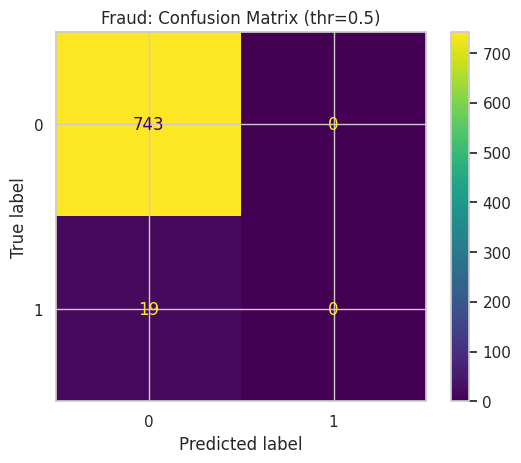


Top 15 features by permutation importance:
num__age                  0.0
num__avg_order_value      0.0
num__total_orders         0.0
num__email_open_rate      0.0
num__loyalty_score        0.0
num__last_purchase        0.0
num__churn_risk           0.0
cat__gender_Female        0.0
cat__gender_Male          0.0
cat__gender_Other         0.0
cat__country_Australia    0.0
cat__country_Brazil       0.0
cat__country_Canada       0.0
cat__country_China        0.0
cat__country_France       0.0
dtype: float64


In [ ]:
target = 'is_fraudulent'
num_feats = [c for c in ['age','avg_order_value','total_orders','email_open_rate','loyalty_score','last_purchase','churn_risk'] if c in df.columns]
cat_feats = [c for c in ['gender','country','preferred_category'] if c in df.columns]
feats = num_feats + cat_feats

if target in df.columns and len(feats) > 0:
    data = df[feats + [target]].dropna()
    X = data[feats]
    y = data[target].astype(int)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    pre = ColumnTransformer(
        transformers=[
            ('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))]), num_feats),
            ('cat', Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                   ('oh', OneHotEncoder(handle_unknown='ignore'))]), cat_feats)
        ]
    )

    clf = RandomForestClassifier(
        n_estimators=300, max_depth=None, n_jobs=-1, random_state=42, class_weight='balanced'
    )

    pipe = Pipeline(steps=[('pre', pre), ('model', clf)])
    pipe.fit(X_train, y_train)

    proba = pipe.predict_proba(X_test)[:,1]
    preds = (proba >= 0.5).astype(int)
    auc = roc_auc_score(y_test, proba)
    ap = average_precision_score(y_test, proba)
    print(f"Fraud ROC-AUC: {auc:.3f} | PR-AUC: {ap:.3f}")
    print(classification_report(y_test, preds, digits=3))
    ConfusionMatrixDisplay.from_predictions(y_test, preds)
    plt.title("Fraud: Confusion Matrix (thr=0.5)"); plt.show()

    # Which features matter?
    X_test_transformed = pipe.named_steps['pre'].transform(X_test)
    r = permutation_importance(pipe.named_steps['model'], X_test_transformed, y_test, n_repeats=10, random_state=42)
    # Get feature names after preprocessing
    feature_names_out = pipe.named_steps['pre'].get_feature_names_out(feats)
    imp = pd.Series(r.importances_mean, index=feature_names_out)
    print("\nTop 15 features by permutation importance:")
    print(imp.sort_values(ascending=False).head(15))

B3) Customer value regression (predict total_spend)

Target: total_spend

Model: Gradient Boosting (strong baseline)

Metrics: MAE, RMSE, R²; permutation importance for drivers

In [ ]:
target = 'total_spend'
num_feats = [c for c in ['age','avg_order_value','total_orders','email_open_rate','loyalty_score','last_purchase','churn_risk'] if c in df.columns]
cat_feats = [c for c in ['gender','country','preferred_category'] if c in df.columns]
feats = num_feats + cat_feats

if target in df.columns and len(feats) > 0:
    data = df[feats + [target]].dropna()
    X = data[feats]
    y = data[target].astype(float)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    pre = ColumnTransformer(
        transformers=[
            ('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                   ('scaler', StandardScaler())]), num_feats),
            ('cat', Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                   ('oh', OneHotEncoder(handle_unknown='ignore'))]), cat_feats)
        ]
    )

    reg = GradientBoostingRegressor(random_state=42)
    pipe = Pipeline(steps=[('pre', pre), ('model', reg)])
    pipe.fit(X_train, y_train)

    pred = pipe.predict(X_test)
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred)
    print(f"Value regression → MAE: {mae:,.2f} | RMSE: {rmse:,.2f} | R²: {r2:.3f}")

    # Cross-val R² for stability
    cv_r2 = cross_val_score(pipe, X, y, cv=5, scoring='r2').mean()
    print(f"5-fold CV R²: {cv_r2:.3f}")

    # Drivers via permutation importance
    X_test_transformed = pipe.named_steps['pre'].transform(X_test)
    r = permutation_importance(pipe.named_steps['model'], X_test_transformed, y_test, n_repeats=10, random_state=42)
    imp = pd.Series(r.importances_mean, index=pipe.named_steps['pre'].get_feature_names_out())
    print("\nTop 15 drivers of total_spend:")
    print(imp.sort_values(ascending=False).head(15))

Value regression → MAE: 26.01 | RMSE: 56.75 | R²: 0.995
5-fold CV R²: 0.992

Top 15 drivers of total_spend:
num__avg_order_value              1.628172e+00
num__total_orders                 4.969168e-01
num__email_open_rate              3.476362e-04
cat__preferred_category_Sports    2.426864e-05
cat__gender_Male                  5.891743e-06
num__churn_risk                   4.567668e-06
num__age                          4.618221e-07
cat__gender_Other                 0.000000e+00
cat__gender_Female                0.000000e+00
cat__preferred_category_Home      0.000000e+00
cat__country_UK                   0.000000e+00
cat__country_Canada               0.000000e+00
cat__country_Brazil               0.000000e+00
cat__country_Germany              0.000000e+00
cat__country_France               0.000000e+00
dtype: float64


Quick “turn insights into action” examples

Churn: sort customers by predicted probability and trigger save offers for the top N.

Fraud: route high-probability cases for manual review before fulfillment.

Value: focus campaigns on features driving spend (e.g., categories/regions with positive importances).

If you want, I can package this into a single run_analysis(df) function that executes all selected tests/models and returns tidy result tables and charts.

Insights & Interpretation

Executive Summary
Customer & Revenue Snapshot

Scale: 5,000 customers across 10 countries and 5 categories.

Revenue proxy (AOV × Orders): $5.19M total; AOV ≈ $108.44, orders ≈ 10.0/customer.

Top revenue contributors:

Categories: Electronics ($1.08M), Home ($1.04M), Beauty ($1.03M), Sports ($1.02M), Fashion ($1.02M) — fairly balanced, with Electronics slightly ahead.

Countries: Brazil ($568k) leads despite only 504 customers; USA ($553k), India ($547k), Germany ($519k), Australia ($517k).

High-value orders: Top 5% of AOV > $239; max AOV $555 (about 4.8% of customers above 95th percentile).

Engagement & Acquisition

Email engagement: Overall open rate ≈ 50.7% (5% missing). Highest by country: India (53%), Japan (52.7%); lowest: Germany (48.5%).
By category: Beauty/Fashion (~51.6%) slightly higher; Electronics (~50.4%) slightly lower.

New customer trend: Signups down ~4.1% in the last 12 months vs the prior 12 months → mild headwind in acquisition.

Retention & Churn

Recent activity: Only 25.5% purchased within the last 90 days → sizable re-activation opportunity.

Loyalty vs churn: No meaningful relationship (Spearman ρ ≈ 0.00).

Open rate vs churn: Near zero (ρ ≈ 0.03).

Value vs churn: Average churn risk ~0.28–0.29 across value quintiles (flat).
Implication: Current churn scoring isn’t reflecting behavioral signals; revisit features/definition.

Fraud Risk

Overall fraud rate: 2.58%.

By country: Highest in Japan (3.8%) and Brazil (3.8%); lowest in France (1.4%).

By category: Electronics/Home/Fashion (~3.2%) higher than Beauty (1.5%) and Sports (1.8%).

By value: Elevated in mid-value segments (Q2–Q4) vs lowest/highest.

What Drives Spend (fast wins)

Total spend correlates very strongly with AOV (ρ ≈ 0.885) and moderately with order count (ρ ≈ 0.443).
Translation: Lifting AOV (bundles, cross-sell, premium add-ons) moves revenue more than nudging frequency by a small margin.

Anomalies & Patterns Worth Attention

AOV tail: A small but meaningful high-AOV tail (> $239). Review margin/profitability and potential fraud signals in this tail (esp. Electronics/Home/Fashion and Brazil/Japan).

Engagement variation: Countries with solid spend but lower open rates (e.g., Germany) look primed for creative/subject-line testing.

Acquisition softness: Slight 12-month decline suggests reallocating spend toward top-converting geos/categories.

Recommended Actions
Revenue Growth

AOV playbook:

Introduce bundled offers/threshold discounts (“free shipping over $X”).

Cross-sell complementary items in Electronics and Home, where revenue is highest.

Geo targeting:

Double down in Brazil/USA/India; test engagement lifts in Germany to unlock underperformance.

Retention

Re-activation program: Target the ~74.5% inactive (no purchase in 90d) with:

Win-back series (tiered incentives), category-specific recommendations, and reminders tied to preferred_category.

Churn model refresh: Current score isn’t predictive. Rebuild with features like recency, frequency, value, category mix, email engagement, and country; validate on ROC-AUC & PR-AUC and calibrate thresholds to budget.

Fraud

Tiered review rules:

Enhanced checks for Japan/Brazil and Electronics/Home/Fashion at mid-value ranges.

Keep customer friction low for Beauty/Sports and France where rates are lower.

Marketing Efficiency

Creative tests by geo:

Optimize subject lines/send times for Germany; replicate India/Japan tactics across similar cohorts.

Fill data gaps: Reduce email_open_rate missingness (5%) to improve targeting reliability.